# Data Description:

The data is related to the direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (‘yes’) or not (‘no’) subscribed.

# Domain:

Banking
# Context:

Leveraging customer information is paramount for most businesses. In the case of a bank, attributes of customers like the ones mentioned below can be crucial in strategizing a marketing campaign when launching a new product.
Attribute Information:

    age (numeric)

    job : type of job (categorical: ‘admin.’,’bluecollar’,’entrepreneur’,’housemaid’,’management’,’retired’,’selfemployed’,’services’,’student’,’technician’,’unemployed’,’unknown’)

    marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’;
    note: ‘divorced’ means divorced or widowed)

    education (categorical:
    ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’univers
    ity.degree’,’unknown’)

    default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)

    balance: average yearly balance, in euros (numeric)

    housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)

    loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)

    contact: contact communication type (categorical: ‘cellular’,’telephone’)

    day: last contact day of the month (numeric 1 -31)

    month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)

    duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet,
    the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

    campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

    pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

    previous: number of contacts performed before this campaign and for this client (numeric)

    poutcome: outcome of the previous marketing campaign (categorical:
    ‘failure’,’nonexistent’,’success’)

    target: has the client subscribed a term deposit? (binary: “yes”,”no”)

# Learning Outcomes:

    Exploratory Data Analysis

    Preparing the data to train a mode

    Training and making predictions using an Ensemble Model

    Tuning an Ensemble model

# Objective:

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).
Steps and tasks:

    Import the necessary libraries (2.5 marks)

    Read the data as a data frame (2.5 marks)

    Perform basic EDA which should include the following and print out your insights at every step. (15 marks)

        The shape of the data (2 marks)

        The data type of each attribute (2 marks)

        Checking the presence of missing values (4 marks)

        Point summary of numerical attributes (3 marks)

        Checking the presence of outliers (4 marks)

    Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc. (15 marks)

    Train a few standard classification algorithms, note, and comment on their performances across different classification metrics. (15 marks)

    Build the ensemble models and compare the results with the base models. Note Random forest can be used only with Decision trees. (15 marks)

    Compare performances of all the models (5 marks)

**Based on the given data, will a customer subscribe to a term deposit or not?**
# Ztest :
https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

In [13]:
#import libraries
%matplotlib inline
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Load the data 

In [14]:
data = pd.read_csv("C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/Udemy/2021DataScienceMachineLearningProjectDeploymentMastery/Section 29Project Assignment/bank-full.csv") 

In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [17]:
data.shape

(45211, 17)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [19]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


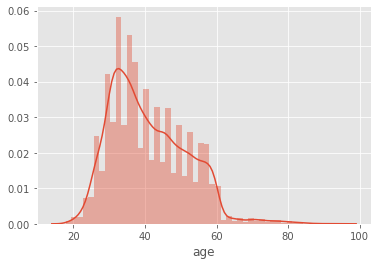

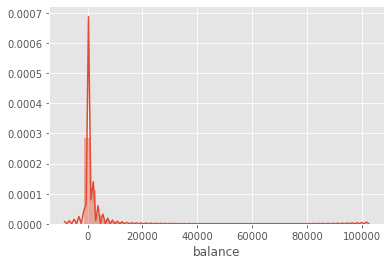

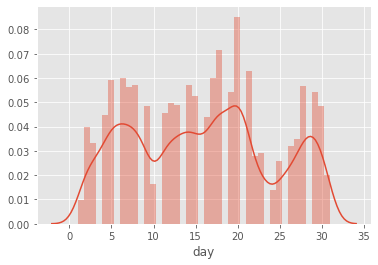

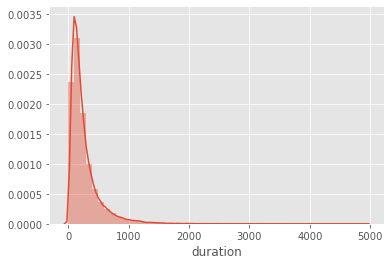

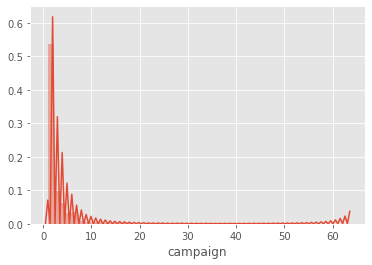

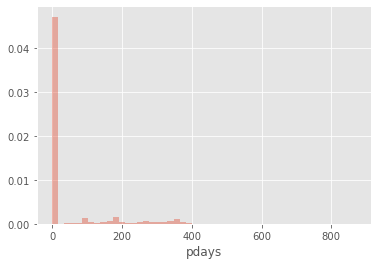

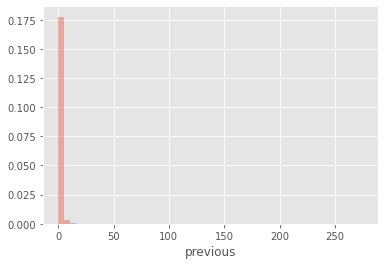

In [20]:
for i in list(data.describe().columns):
    sns.distplot(data[i].dropna())
    plt.show()

# Outilier :
https://towardsdatascience.com/creating-custom-transformers-using-scikit-learn-5f9db7d7fdb5
https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8

https://blockgeni.com/classification-algorithms-for-imbalanced-datasets/

https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
https://heartbeat.fritz.ai/how-to-make-your-machine-learning-models-robust-to-outliers-44d404067d07

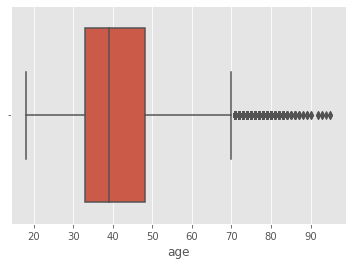

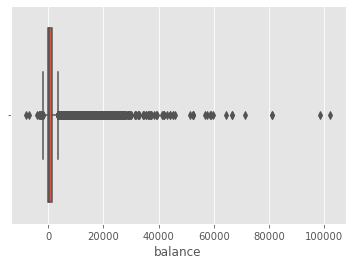

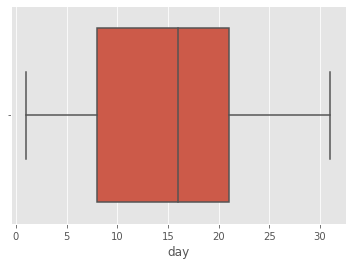

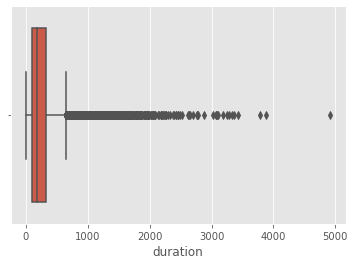

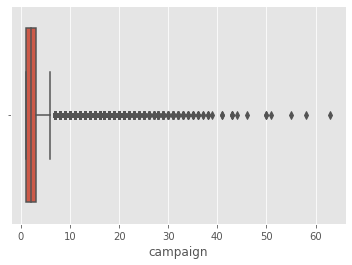

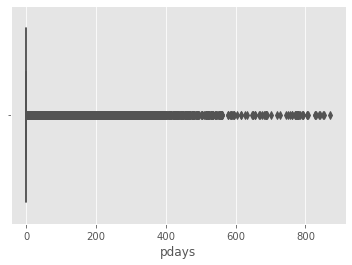

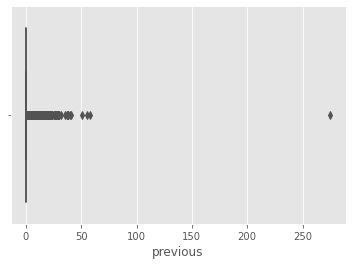

In [21]:
for i in list(data.describe().columns):
    sns.boxplot(data[i].dropna())
    plt.show()

# Oulier before preprocessing 


In [22]:
from sklearn.neighbors import LocalOutlierFactor
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(data.drop('Target', axis=1).select_dtypes(include=['int64','float64']))

In [23]:
data['outlier_beforeprepocess'] =yhat

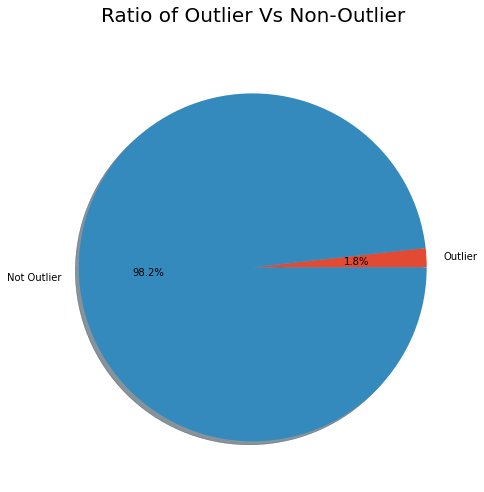

In [24]:
# select all rows that are not outliers
mask = yhat != -1
Outlier =len(data[data['outlier_beforeprepocess']==-1])
notOutlier = len(data[data['outlier_beforeprepocess']==1])

# Data to plot
labels = 'Outlier','Not Outlier'
sizes = [Outlier,notOutlier]

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of Outlier Vs Non-Outlier\n', fontsize=20)
sns.set_context("paper", font_scale=2)

# Replace oulier 


In [25]:
data.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous,outlier_beforeprepocess
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.964345
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.264651
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,-1.000000
1%,23.000000,-627.000000,2.000000,11.000000,1.000000,-1.000000,0.000000,-1.000000
5%,27.000000,-172.000000,3.000000,35.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
95%,59.000000,5768.000000,29.000000,751.000000,8.000000,317.000000,3.000000,1.000000


In [26]:
class OutlierReplace(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor

    def outlier_removal(self,X,y=None):
        X = pd.Series(X).copy()
        qmin=X.quantile(0.05)
        qmax=X.quantile(0.95)
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (self.factor * iqr)
        upper_bound = q3 + (self.factor * iqr)
        #X.loc[((X < lower_bound) | (X > upper_bound))] = np.nan 
        X.loc[X < lower_bound] = qmin
        X.loc[X > upper_bound] = qmax
        return pd.Series(X)

    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        return X.apply(self.outlier_removal)

# Test function 

In [27]:
test = pd.DataFrame({'col1':[100,200,300,999,0],'col2':[0,0,1,2,-100],'col3':[-10,0,1,2,80]})
test

,col1,col2,col3
0,100,0,-10
1,200,0,0
2,300,1,1
3,999,2,2
4,0,-100,80


In [28]:
test.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,col1,col2,col3
count,5.000000,5.000000,5.000000
mean,319.800000,-19.400000,14.600000
std,395.803234,45.064398,36.875466
min,0.000000,-100.000000,-10.000000
1%,4.000000,-96.000000,-9.600000
5%,20.000000,-80.000000,-8.000000
25%,100.000000,0.000000,0.000000
50%,200.000000,0.000000,1.000000
75%,300.000000,1.000000,2.000000
95%,859.200000,1.800000,64.400000


In [29]:
outlier_Replace = OutlierReplace()
outlier_Replace.fit_transform(test)

,col1,col2,col3
0,100.0,0.0,-8.0
1,200.0,0.0,0.0
2,300.0,1.0,1.0
3,859.2,2.0,2.0
4,0.0,-80.0,64.4


In [30]:
test.clip(lower=test.quantile(0.05), upper=test.quantile(0.95), axis=1)

,col1,col2,col3
0,100.0,0.0,-8.0
1,200.0,0.0,0.0
2,300.0,1.0,1.0
3,859.2,1.8,2.0
4,20.0,-80.0,64.4


# After replacing Oulier 


In [31]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
datawithoutoulier= outlier_Replace.fit_transform(data.drop(['Target','outlier_beforeprepocess'], axis=1).select_dtypes(include=['int64','float64']))
yhat2 = lof.fit_predict(datawithoutoulier)
data['outlier_Afterprepocess'] =yhat2

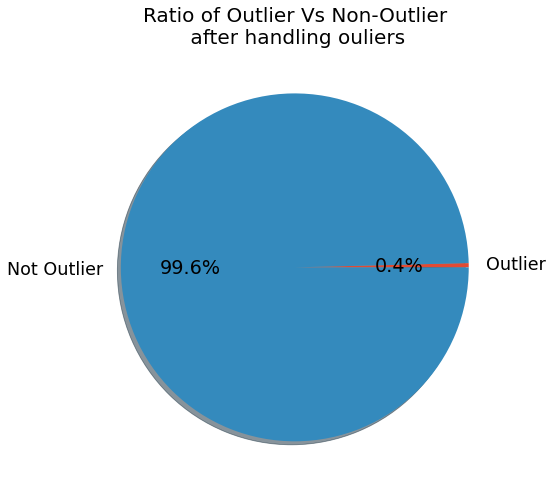

In [32]:
# select all rows that are not outliers
mask = yhat != -1
Outlier =len(data[data['outlier_Afterprepocess']==-1])
notOutlier = len(data[data['outlier_Afterprepocess']==1])

# Data to plot
labels = 'Outlier','Not Outlier'
sizes = [Outlier,notOutlier]

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of Outlier Vs Non-Outlier\n after handling ouliers', fontsize=20)
sns.set_context("paper", font_scale=2)

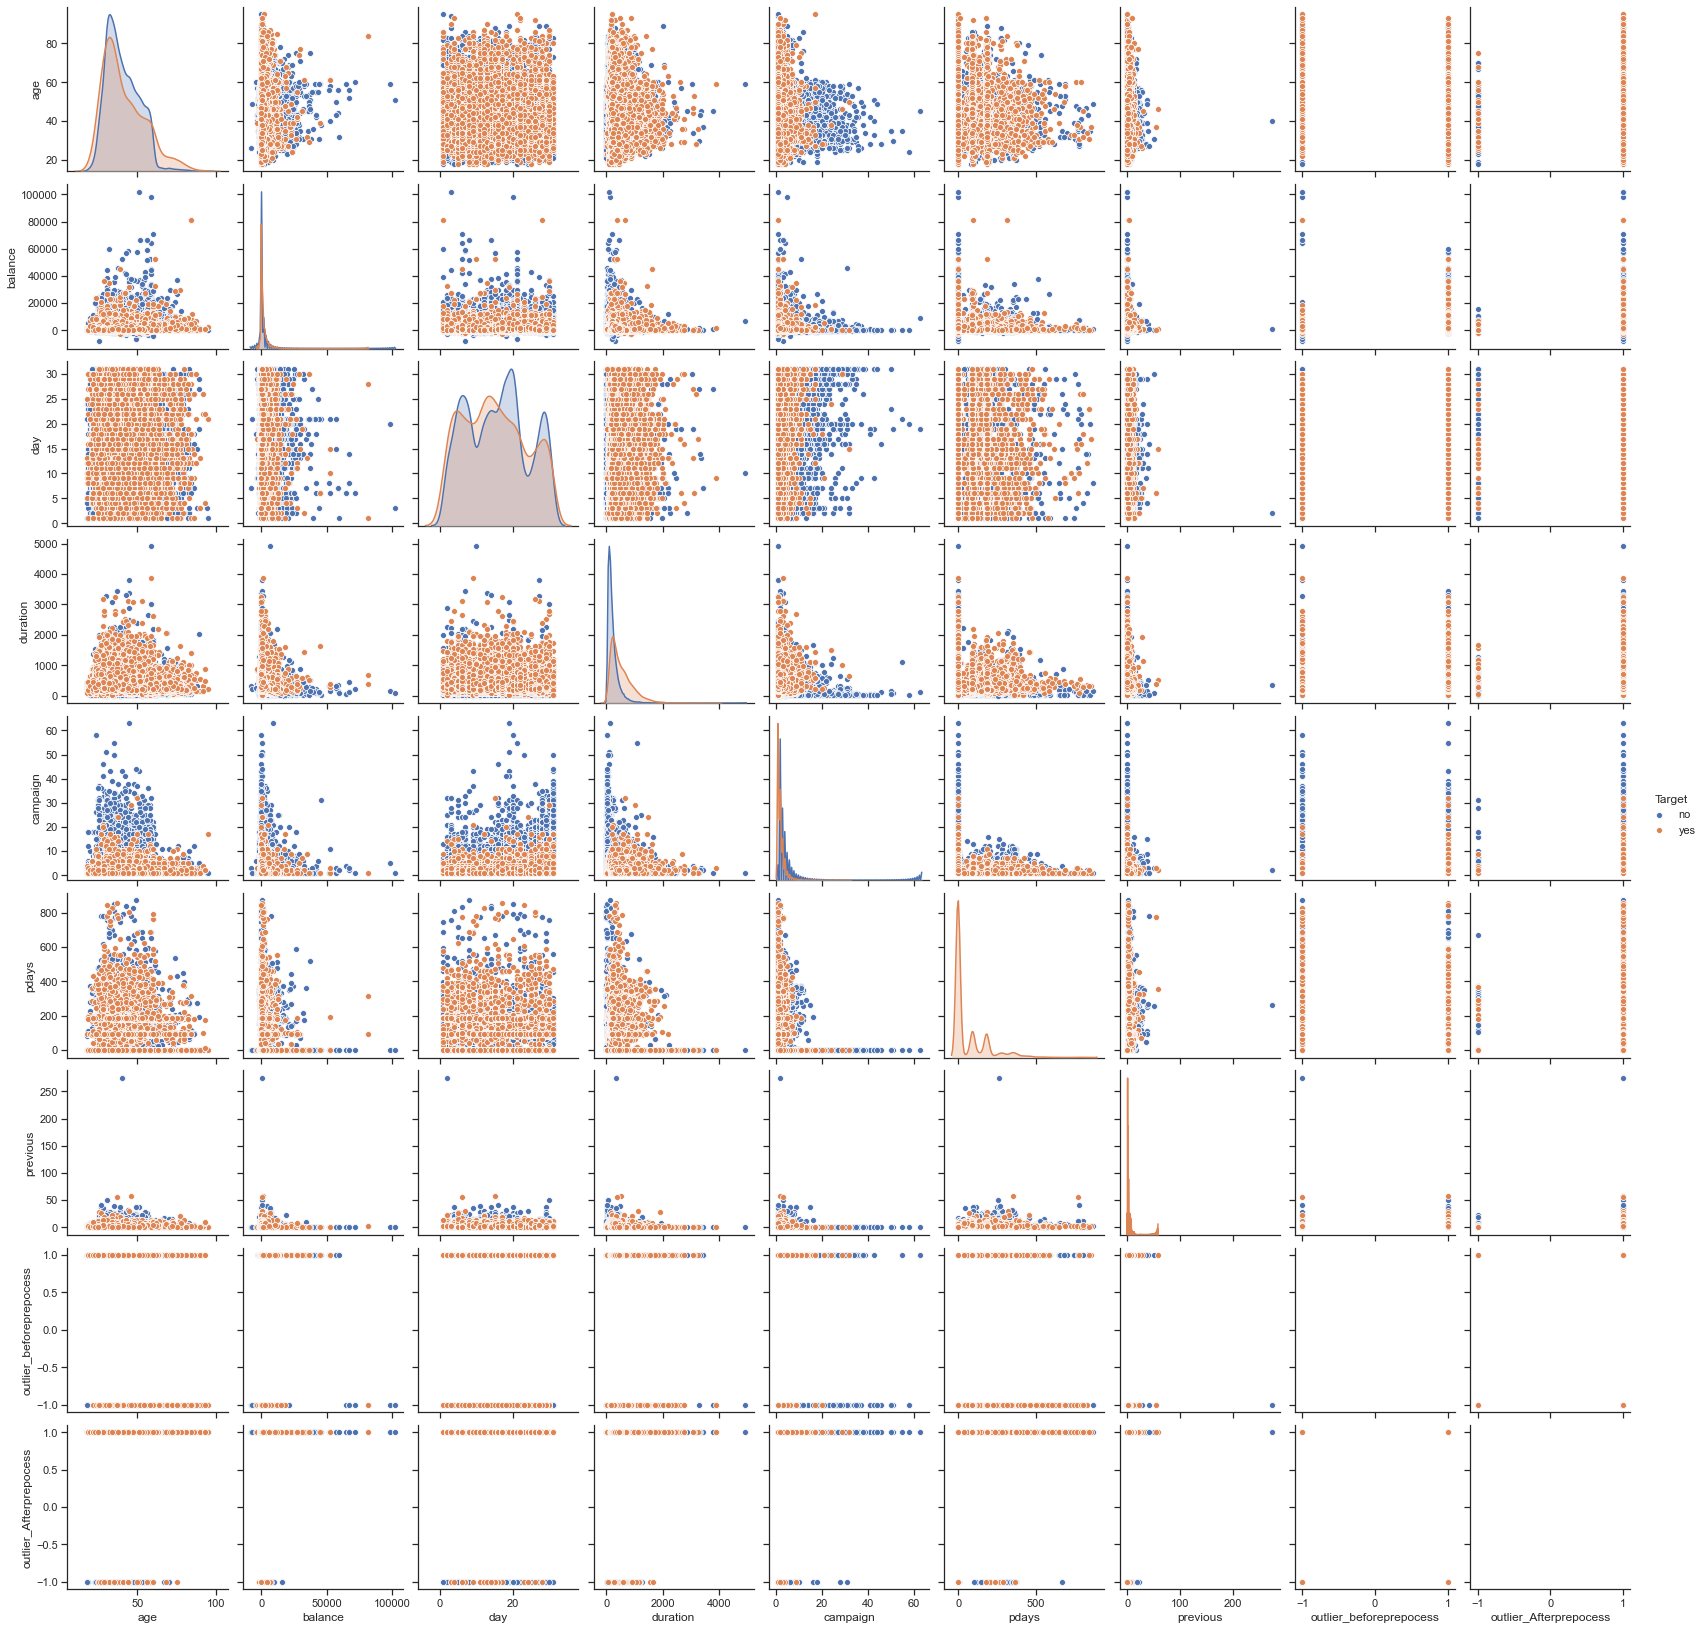

In [33]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data, hue='Target')

# Correlation  :


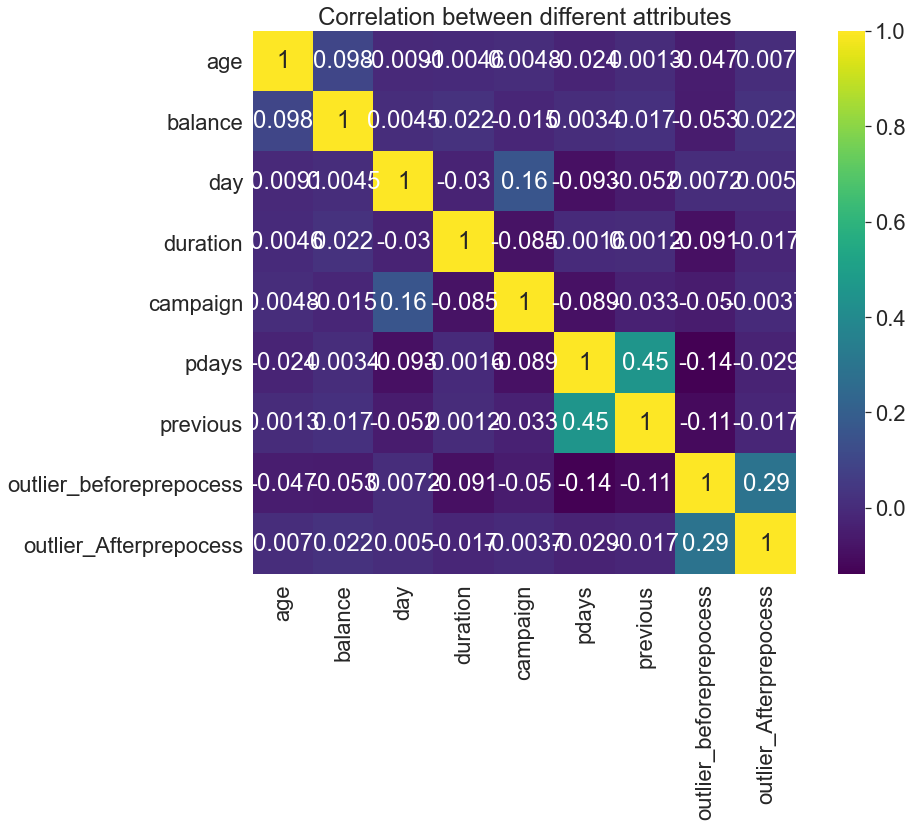

In [34]:
plt.figure(figsize=(15,10))
sns.set(font_scale=2)
sns.heatmap(data.corr(), vmax=1, square=True, annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

#  Classification Target

no     39922
yes     5289
Name: Target, dtype: int64


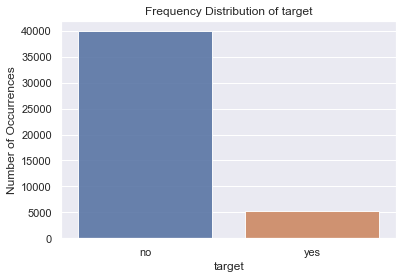

In [35]:
# Create a series out of the Country column
y = data['Target']

# Get the counts of each category
y_counts = y.value_counts()

# Print the count values for each category
print(y_counts)
sns.set(style="darkgrid")
sns.barplot(y_counts.index, y_counts.values, alpha=0.9)
plt.title('Frequency Distribution of target')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('target', fontsize=12)
plt.show()

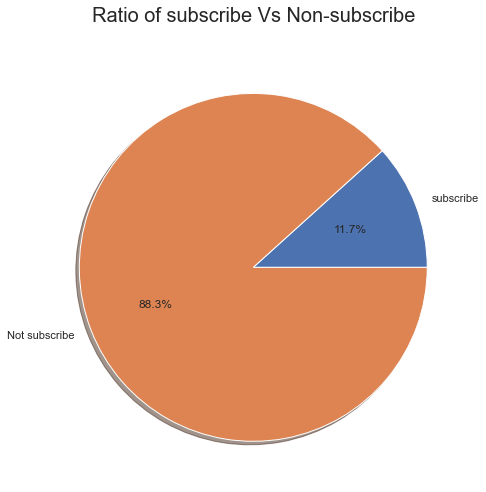

In [36]:
notsubscribe =len(data[data['Target']=='no'])
subscribe = len(data[data['Target']=='yes'])

# Data to plot
labels = 'subscribe','Not subscribe'
sizes = [subscribe,notsubscribe]

# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of subscribe Vs Non-subscribe\n', fontsize=20)
sns.set_context("paper", font_scale=2)


#  Generate Synthetic Samples
SMOTE(SMOTE or Synthetic Minority Oversampling Technique)

SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.


# X and y
##  Split the dataset and labels into training and test sets

In [37]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'outlier_beforeprepocess',
       'outlier_Afterprepocess'],
      dtype='object')

In [38]:
# Create arrays for the features and the response variable
colonne_cible = "Target"
y= data['Target']
X = data.drop(['Target'], axis=1)


# Balance the dataset with synthetic samples (SMOTE)

In addition to being extremely small, our training dataset has the unbalanced target binary variable, which can undermine some models' predictability. We will perform an oversampling, which consists of creating new samples to increase the 0 minority class. For this we will use the SMOTE technique.

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbor


# Preprocess pipe 



In [39]:
    
from sklearn.pipeline import Pipeline, TransformerMixin
from sklearn.neighbors import LocalOutlierFactor

class OutlierExtractor(TransformerMixin):
    def __init__(self, **kwargs):
        """
        Create a transformer to remove outliers. A threshold is set for selection
        criteria, and further arguments are passed to the LocalOutlierFactor class

        Keyword Args:
            neg_conf_val (float): The threshold for excluding samples with a lower
               negative outlier factor.

        Returns:
            object: to be used as a transformer method as part of Pipeline()
        """

        self.threshold = kwargs.pop('neg_conf_val', -10.0)

        self.kwargs = kwargs

    def transform(self, X, y):
        """
        Uses LocalOutlierFactor class to subselect data based on some threshold

        Returns:
            ndarray: subsampled data

        Notes:
            X should be of shape (n_samples, n_features)
        """
        X = np.asarray(X)
        y = np.asarray(y)
        lcf = LocalOutlierFactor(**self.kwargs)
        lcf.fit(X)
        return (X[lcf.negative_outlier_factor_ > self.threshold, :],
                y[lcf.negative_outlier_factor_ > self.threshold])

    def fit(self, *args, **kwargs):
        return self

In [40]:
# select the float columns
num_columns = X.select_dtypes(include=['int64','float64']).columns
# select non-numeric columns
cat_columns = X.select_dtypes(exclude=['int64','float64']).columns

fill_missing_then_one_hot_encoder = make_pipeline(
    SimpleImputer(strategy='most_frequent', fill_value='manquante',add_indicator=True),
    OneHotEncoder(handle_unknown='ignore')
)
fill_missing_then_Standar_scaler = make_pipeline( OutlierReplace(),
                                                 SimpleImputer(strategy='median',add_indicator=True),
    StandardScaler()
)

data_preprocess = make_column_transformer(
    ( fill_missing_then_one_hot_encoder , cat_columns),
    ( fill_missing_then_Standar_scaler, num_columns)
)

In [41]:
X_pre =data_preprocess.fit_transform(X)
y_pre= LabelEncoder().fit_transform(y)
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pre, y_pre, test_size=0.05)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

2261 rows in test set vs. 42950 in training set. 55 Features.


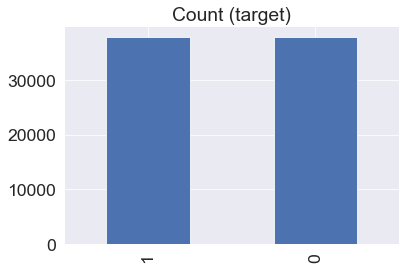

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(X_train, y_train)

df = pd.DataFrame(X_sm)
df['target'] = y_sm

df['target'].value_counts().plot(kind='bar', title='Count (target)')

In [43]:
X_sm.shape

(75832, 55)

In [44]:
df['target'].unique()

array([0, 1])

# Define Cross-Validation Process 

In [45]:
from sklearn.model_selection import KFold

cross_validation_design = KFold(n_splits=5,
                                shuffle=True,
                                random_state=77)
cross_validation_design

KFold(n_splits=5, random_state=77, shuffle=True)

# RandomForest Classifer: 

In [46]:
from sklearn.model_selection import GridSearchCV
# Set a range for n_estimators from 10 to 40 in steps of 10
param_grid = {'n_estimators': range(10, 50,10)}

# Optimize for a RandomForestClassifier() using GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_sm, y_sm)
grid.best_params_

{'n_estimators': 40}

In [47]:
print("train accucary score :{}".format(metrics.roc_auc_score(y_sm,grid.predict_proba(X_sm)[:,1])))
#print("test accucary score :{}".format(auc(grid_search,X_test, y_test)))
print("test accucary score :{}".format(metrics.roc_auc_score(y_test,grid.predict_proba(X_test)[:,1])))

train accucary score :0.9999999951308516
test accucary score :0.9369753484644107


In [48]:
from catboost import CatBoostClassifier
#importing library and building model

modelcat=CatBoostClassifier(eval_metric="AUC", depth=10, iterations=15, l2_leaf_reg= 9, learning_rate= 0.15)
modelcat.fit(X_sm, y_sm,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8974762	best: 0.8974762 (0)	total: 1.9s	remaining: 26.6s
1:	test: 0.9148652	best: 0.9148652 (1)	total: 2.88s	remaining: 18.7s
2:	test: 0.9196030	best: 0.9196030 (2)	total: 3.72s	remaining: 14.9s
3:	test: 0.9201093	best: 0.9201093 (3)	total: 4.43s	remaining: 12.2s
4:	test: 0.9218208	best: 0.9218208 (4)	total: 5.17s	remaining: 10.3s
5:	test: 0.9247454	best: 0.9247454 (5)	total: 6.04s	remaining: 9.06s
6:	test: 0.9256671	best: 0.9256671 (6)	total: 6.88s	remaining: 7.87s
7:	test: 0.9262575	best: 0.9262575 (7)	total: 7.66s	remaining: 6.71s
8:	test: 0.9270473	best: 0.9270473 (8)	total: 8.41s	remaining: 5.61s
9:	test: 0.9291508	best: 0.9291508 (9)	total: 9.11s	remaining: 4.55s
10:	test: 0.9292290	best: 0.9292290 (10)	total: 9.72s	remaining: 3.54s
11:	test: 0.9292300	best: 0.9292300 (11)	total: 10.4s	remaining: 2.59s
12:	test: 0.9313510	best: 0.9313510 (12)	total: 11s	remaining: 1.69s
13:	test: 0.9319209	best: 0.9319209 (13)	total: 11.7s	remaining: 833ms
14:	test: 0.9333304	best: 0.9

In [49]:
print("train accucary score :{}".format(metrics.roc_auc_score(y_sm,modelcat.predict_proba(X_sm)[:,1])))
#print("test accucary score :{}".format(auc(grid_search,X_test, y_test)))
print("test accucary score :{}".format(metrics.roc_auc_score(y_test,modelcat.predict_proba(X_test)[:,1])))

train accucary score :0.9774570111652411
test accucary score :0.9333304009540008


# XGBOOST 


In [50]:
import xgboost as xgb
from sklearn import metrics


# Parameter Tuning
model = xgb.XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = cross_validation_design, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(X_sm, y_sm)

grid_search.best_estimator_
#model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          #n_jobs=-1 , verbose=1,learning_rate=0.16)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 47.3min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 73.1min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 102.5min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 102.5min
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed: 102.5min
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed: 102.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 102.5min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed: 102.5min
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed: 102.5min
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed: 102.5min


KeyboardInterrupt: 

In [51]:
XGB_model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)
XGB_model.fit(X_sm, y_sm)

[16:42:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:42:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.16, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbose=1,
              verbosity=None)

In [53]:
print("train accucary score :{}".format(metrics.roc_auc_score(y_sm,XGB_model.predict_proba(X_sm)[:,1])))
#print("test accucary score :{}".format(auc(grid_search,X_test, y_test)))
print("test accucary score :{}".format(metrics.roc_auc_score(y_test,XGB_model.predict_proba(X_test)[:,1])))

train accucary score :1.0
test accucary score :0.9412761714855433


# KNN 

In [54]:
from sklearn.neighbors import KNeighborsClassifier
# Define a grid for n_neighbors with values 10, 50 and 100
param_grid = {'n_neighbors': [5,10,50]}

# Optimize for KNeighborsClassifier() using GridSearchCV
gridknn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=cross_validation_design)
gridknn.fit(X_train, y_train)
gridknn.best_params_

{'n_neighbors': 10}

In [55]:
print("train accucary score :{}".format(metrics.roc_auc_score(y_sm,gridknn.predict_proba(X_sm)[:,1])))
#print("test accucary score :{}".format(auc(grid_search,X_test, y_test)))
print("test accucary score :{}".format(metrics.roc_auc_score(y_test,gridknn.predict_proba(X_test)[:,1])))

train accucary score :0.9578354039002
test accucary score :0.89489472758196


# Stacking :
## Stacking model1 :EnsembleVoteClassifier

[17:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


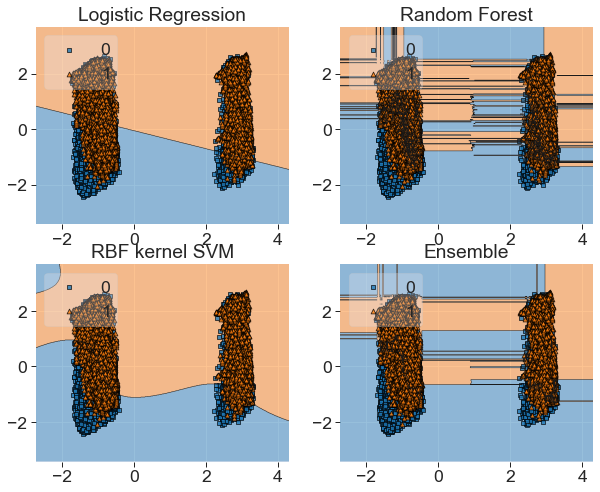

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
clf4= xgb.XGBClassifier()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3,clf4],
                              weights=[1, 2, 1,2], voting='soft')
pca = PCA(n_components=2)
X_reduced=pca.fit_transform(X_sm)
# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

labels = ['Logistic Regression',
          'Random Forest',
          'RBF kernel SVM',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3,clf4, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X_reduced, df['target'])
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_reduced, y=y_sm,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [57]:
eclf.fit(X_sm, y_sm)

print("train accucary score :{}".format(metrics.roc_auc_score(y_sm,eclf.predict_proba(X_sm)[:,1])))
#print("test accucary score :{}".format(auc(grid_search,X_test, y_test)))
print("test accucary score :{}".format(metrics.roc_auc_score(y_test,eclf.predict_proba(X_test)[:,1])))

[18:55:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accucary score :0.9987041283233288
test accucary score :0.94489472758196


# 2 Stacking model

In [58]:
# 2 Stacking model :
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingCVClassifier
import numpy as np
import warnings

warnings.simplefilter('ignore')

RANDOM_SEED = 42

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=RANDOM_SEED)
clf3 = GaussianNB()
lr = LogisticRegression()

sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3],
                            meta_classifier=lr,
                            random_state=RANDOM_SEED)
sclf.fit(X_sm, y_sm)
print("train accucary score :{}".format(metrics.roc_auc_score(y_sm,sclf.predict_proba(X_sm)[:,1])))
#print("test accucary score :{}".format(auc(grid_search,X_test, y_test)))
print("test accucary score :{}".format(metrics.roc_auc_score(y_test,sclf.predict_proba(X_test)[:,1])))

train accucary score :1.0
test accucary score :0.8574267393896742


# Example 2 - Using Probabilities as Meta-Features

Alternatively, the class-probabilities of the first-level classifiers can be used to train the meta-classifier (2nd-level classifier) by setting use_probas=True. If average_probas=True, the probabilities of the level-1 classifiers are averaged, if average_probas=False, the probabilities are stacked (recommended). For example, in a 3-class setting with 2 level-1 classifiers, these classifiers may make the following "probability" predictions for 1 training sample:

    classifier 1: [0.2, 0.5, 0.3]
    classifier 2: [0.3, 0.4, 0.4]

If **average_probas=True**, the meta-features would be:

    [0.25, 0.45, 0.35]

In contrast, using **average_probas=False** results in k features where, k = [n_classes * n_classifiers], by stacking these level-1 probabilities:

    [0.2, 0.5, 0.3, 0.3, 0.4, 0.4]


In [59]:
from mlxtend.classifier import StackingClassifier
sclf_with_proba = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          use_probas=True,
                          meta_classifier=lr)
sclf_with_proba.fit(X_sm, y_sm)
print("train accucary score :{}".format(metrics.roc_auc_score(y_sm,sclf_with_proba.predict_proba(X_sm)[:,1])))
#print("test accucary score :{}".format(auc(grid_search,X_test, y_test)))
print("test accucary score :{}".format(metrics.roc_auc_score(y_test,sclf_with_proba.predict_proba(X_test)[:,1])))

train accucary score :1.0
test accucary score :0.9273434598166286


# Stack 3 

In [60]:
from mlxtend.classifier import StackingClassifier

stack3= StackingClassifier(
    classifiers=[
        LogisticRegression(),
        xgb.XGBClassifier()
    ],
    use_probas=True,
    meta_classifier=LogisticRegression()
)
stack3.fit(X_sm, y_sm)
print("train accucary score :{}".format(metrics.roc_auc_score(y_sm,stack3.predict_proba(X_sm)[:,1])))
#print("test accucary score :{}".format(auc(grid_search,X_test, y_test)))
print("test accucary score :{}".format(metrics.roc_auc_score(y_test,stack3.predict_proba(X_test)[:,1])))

[19:05:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accucary score :0.9955816429254594
test accucary score :0.9214904306687781


# Comparing :


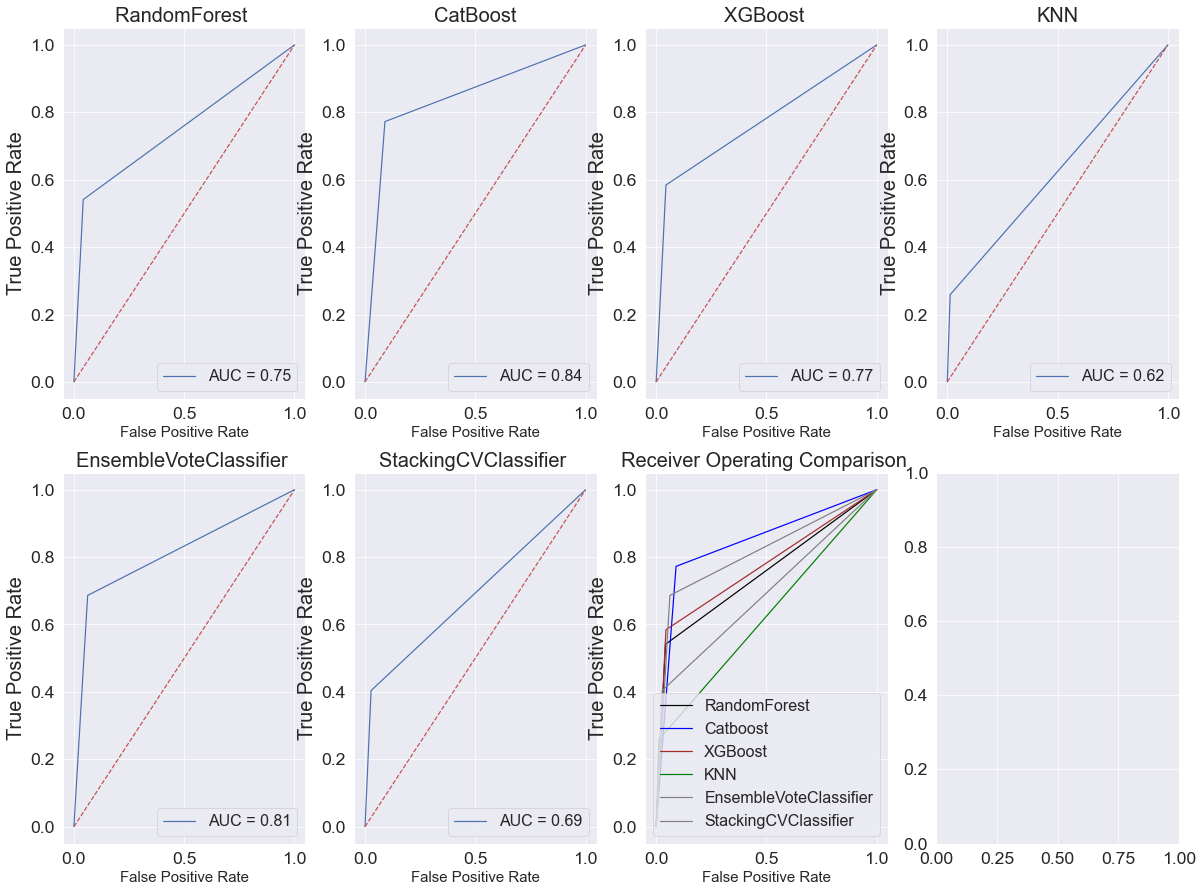

In [61]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 4, figsize = (20,15))


#----------RandomForest---------


RadomForest_pred = grid.predict(X_test)
fprdm, tprdm, thresholddm = metrics.roc_curve(y_test,RadomForest_pred)
roc_aucxgb = metrics.auc(fprdm,tprdm)

ax_arr[0,0].plot(fprdm,  tprdm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('RandomForest ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})


#----------Catboost---------

modelcat_pred = modelcat.predict(X_test)
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, modelcat_pred)
roc_aucxgb = metrics.auc(fprlog, tprlog)

ax_arr[0,1].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('CatBoost',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})


#----------XGBoost---------


XGBClassifier_pred = XGB_model.predict(X_test)
#preds = probs[:,1]
fprsm, tprsm, thresholdsm = metrics.roc_curve(y_test, XGBClassifier_pred)
roc_aucxgb = metrics.auc(fprsm, tprsm)


ax_arr[0,2].plot(fprsm, tprsm, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('XGBoost ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})



#----------KNN---------

Knn_pred = gridknn.predict(X_test)
#preds = probs[:,1]
fprgnb, tprgnb, thresholdgnd = metrics.roc_curve(y_test, Knn_pred)
roc_aucxgb = metrics.auc(fprgnb, tprgnb)


ax_arr[0,3].plot(fprgnb, tprgnb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[0,3].plot([0, 1], [0, 1],'r--')
ax_arr[0,3].set_title('KNN',fontsize=20)
ax_arr[0,3].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,3].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,3].legend(loc = 'lower right', prop={'size': 16})


#----------EnsembleVoteClassifier---------


EnsembleVoteClassifier_pred = eclf.predict(X_test)
#preds = probs[:,1]
fprfst, tprfst, thresholdfst = metrics.roc_curve(y_test, EnsembleVoteClassifier_pred)
roc_aucxgb = metrics.auc(fprfst, tprfst)


ax_arr[1,0].plot(fprfst, tprfst, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('EnsembleVoteClassifier ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


#----------StackingCVClassifier---------


grid_pred = sclf.predict(X_test)
fprgsv, tprgsv, thresholdgsv = metrics.roc_curve(y_test, grid_pred )
roc_aucxgb = metrics.auc(fprgsv,  tprgsv)


ax_arr[1,1].plot(fprgsv,  tprgsv, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('StackingCVClassifier ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})


#----------ALL---------


ax_arr[1,2].plot(fprdm, tprdm, 'b', label = 'RandomForest', color='black')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Catboost', color='blue')
ax_arr[1,2].plot(fprsm, tprsm, 'b', label = 'XGBoost', color='brown')
ax_arr[1,2].plot(fprgnb, tprgnb, 'b', label = 'KNN', color='green')
ax_arr[1,2].plot(fprfst, tprfst, 'b', label = 'EnsembleVoteClassifier', color='grey')
ax_arr[1,2].plot(fprgsv,  tprgsv, 'b', label = 'StackingCVClassifier', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})